## Analizador Lexico
Un analizador lexico transforma una entrada en tokens

In [135]:
entrada = "Si si es de dia entonces mañana no es de noche"

In [136]:
tokens = entrada.lower().split()
tokens

['si',
 'si',
 'es',
 'de',
 'dia',
 'entonces',
 'mañana',
 'no',
 'es',
 'de',
 'noche']

In [137]:
from enum import Enum

class TipoToken(Enum):
    O = 1
    Y = 2
    S = 3
    N = 4
    E = 5
    P = 6

In [138]:
lexemas = []
for token in tokens:
    if token == 'o':
        lexemas.append({"valor" : token , "tipo": TipoToken.O })
    elif token == 'y':
        lexemas.append({"valor" : token , "tipo": TipoToken.Y})
    elif token == 'si':
        lexemas.append({"valor" : token , "tipo": TipoToken.S})
    elif token == 'entonces':
        lexemas.append({"valor" : token , "tipo": TipoToken.E})
    elif token == 'no':
        lexemas.append({"valor" : token , "tipo": TipoToken.N})
    else :
        lexemas.append({"valor" :token , "tipo": TipoToken.P })
        
lexemas

[{'valor': 'si', 'tipo': <TipoToken.S: 3>},
 {'valor': 'si', 'tipo': <TipoToken.S: 3>},
 {'valor': 'es', 'tipo': <TipoToken.P: 6>},
 {'valor': 'de', 'tipo': <TipoToken.P: 6>},
 {'valor': 'dia', 'tipo': <TipoToken.P: 6>},
 {'valor': 'entonces', 'tipo': <TipoToken.E: 5>},
 {'valor': 'mañana', 'tipo': <TipoToken.P: 6>},
 {'valor': 'no', 'tipo': <TipoToken.N: 4>},
 {'valor': 'es', 'tipo': <TipoToken.P: 6>},
 {'valor': 'de', 'tipo': <TipoToken.P: 6>},
 {'valor': 'noche', 'tipo': <TipoToken.P: 6>}]

## Analizador Sintactico

In [139]:
class EstadosAnalizador(Enum):
    INICIO = 1
    ATOMO1 = 2
    ATOMO2 = 15
    ATOMO3 = 16
    ATOMO4 = 17
    ATOMO5 = 18
    ATOMO6 = 19
    ATOMO7 =22
    PRECEDENTE = 2
    ERROR1 = 3
    ERROR2 = 11
    ERROR3 = 12
    ERROR4 = 13
    ERROR5 = 14
    ERROR6 = 20
    ERROR7 = 21
    NEGACION = 4
    CONSECUENTE = 5
    ATOMO = 6
    DISYUNCION = 7
    CONJUNCION = 8
    FIN = 10

In [140]:
def analizador_sintactico(lexemas : list):
    # Establecer inicio como el estado inicial
    EstadoActual = EstadosAnalizador.INICIO

    # Iterar sobre cada lexema
    for l in lexemas:
        lexema = l["tipo"]
        if EstadoActual == EstadosAnalizador.INICIO:
            if lexema == TipoToken.S:
                EstadoActual = EstadosAnalizador.PRECEDENTE
            else:
                EstadoActual = EstadosAnalizador.ERROR1
        elif EstadoActual == EstadosAnalizador.PRECEDENTE:
            if lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION
            elif lexema == "es":
                EstadoActual = EstadosAnalizador.CONSECUENTE
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.NEGACION:
            if lexema == "de":
                EstadoActual = EstadosAnalizador.ATOMO
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.CONSECUENTE:
            if lexema == "de":
                EstadoActual = EstadosAnalizador.ATOMO
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.ATOMO:
            if lexema == "entonces":
                EstadoActual = EstadosAnalizador.FIN
            elif lexema == "y":
                EstadoActual = EstadosAnalizador.CONJUNCION
            elif lexema == "o":
                EstadoActual = EstadosAnalizador.DISYUNCION
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.CONJUNCION:
            if lexema == "de":
                EstadoActual = EstadosAnalizador.ATOMO
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.DISYUNCION:
            if lexema == "de":
                EstadoActual = EstadosAnalizador.ATOMO
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.ERROR1:
            break
        elif EstadoActual == EstadosAnalizador.ERROR2:
            break
        elif EstadoActual == EstadosAnalizador.FIN:
            break
    return EstadoActual

In [141]:
archivo = open('Reglas.txt', 'r')
contenido = archivo.read()
archivo.close()

print(contenido)

Si es soleado entonces es un buen día
Si está nublado o hace frío entonces puede llover
Si llueve entonces no es soleado
Si hay tormenta entonces no es seguro
Si es de noche entonces no hay sol
Si hace frío entonces lleva abrigo
Si hace calor entonces usa protector solar
Si nieva entonces hace mucho frío
Si hay viento entonces vuela el polvo
Si es soleado y hace calor entonces es verano



In [142]:
archivo = open('Reglas2.txt', 'r')
contenido = archivo.read()
archivo.close()

print(contenido)

1. S → B
2. N ∨ F → L
3. L → ¬S
4. T → ¬P
5. D → ¬H
6. F → A
7. C → U
8. N → F
9. V → D
10. S ∧ C → V


In [143]:
class Nodo:
    def __init__(self, dato):
        # "dato" puede ser de cualquier tipo, incluso un objeto si se sobrescriben los operadores de comparación
        self.dato = dato
        self.izquierda = None
        self.derecha = None

In [144]:
class Arbol:
    # Funciones privadas
    def __init__(self, dato):
        self.raiz = Nodo(dato)

    def __agregar_recursivo(self, nodo, dato):
        if dato < nodo.dato:
            if nodo.izquierda is None:
                nodo.izquierda = Nodo(dato)
            else:
                self.__agregar_recursivo(nodo.izquierda, dato)
        else:
            if nodo.derecha is None:
                nodo.derecha = Nodo(dato)
            else:
                self.__agregar_recursivo(nodo.derecha, dato)

    def __inorden_recursivo(self, nodo):
        if nodo is not None:
            self.__inorden_recursivo(nodo.izquierda)
            print(nodo.dato, end=", ")
            self.__inorden_recursivo(nodo.derecha)

    def __preorden_recursivo(self, nodo):
        if nodo is not None:
            print(nodo.dato, end=", ")
            self.__preorden_recursivo(nodo.izquierda)
            self.__preorden_recursivo(nodo.derecha)

    def __postorden_recursivo(self, nodo):
        if nodo is not None:
            self.__postorden_recursivo(nodo.izquierda)
            self.__postorden_recursivo(nodo.derecha)
            print(nodo.dato, end=", ")

    def __buscar(self, nodo, busqueda):
        if nodo is None:
            return None
        if nodo.dato == busqueda:
            return nodo
        if busqueda < nodo.dato:
            return self.__buscar(nodo.izquierda, busqueda)
        else:
            return self.__buscar(nodo.derecha, busqueda)

    # Funciones públicas

    def agregar(self, dato):
        self.__agregar_recursivo(self.raiz, dato)

    def inorden(self):
        print("Imprimiendo árbol inorden: ")
        self.__inorden_recursivo(self.raiz)
        print("")

    def preorden(self):
        print("Imprimiendo árbol preorden: ")
        self.__preorden_recursivo(self.raiz)
        print("")

    def postorden(self):
        print("Imprimiendo árbol postorden: ")
        self.__postorden_recursivo(self.raiz)
        print("")

    def buscar(self, busqueda):
        return self.__buscar(self.raiz, busqueda)

In [145]:
arbol = Arbol("soleado")
arbol.agregar("nublado")
arbol.agregar("hace mucho frío")
arbol.agregar("hace calor entonces es verano")
arbol.agregar("lleva abrigo")
arbol.agregar("protector solar")
arbol.agregar("vuela el polvo")
#nombre = input("Ingresa algo para agregar al árbol: ")
#arbol.agregar(nombre)
arbol.preorden()
# Búsqueda
busqueda = input("Busca algo en el árbol: ")
nodo = arbol.buscar(busqueda)
if nodo is None:
    print(f"{busqueda} no existe")
else:
    print(f"{busqueda} sí existe")
    # Aquí tienes en "nodo" toda la información del nodo. Tanto su izquierda, derecha, dato y otros atributos que le hayas agregado

Imprimiendo árbol preorden: 
soleado, nublado, hace mucho frío, hace calor entonces es verano, lleva abrigo, protector solar, vuela el polvo, 
<asdf no existe


In [146]:
pip install networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


In [147]:
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

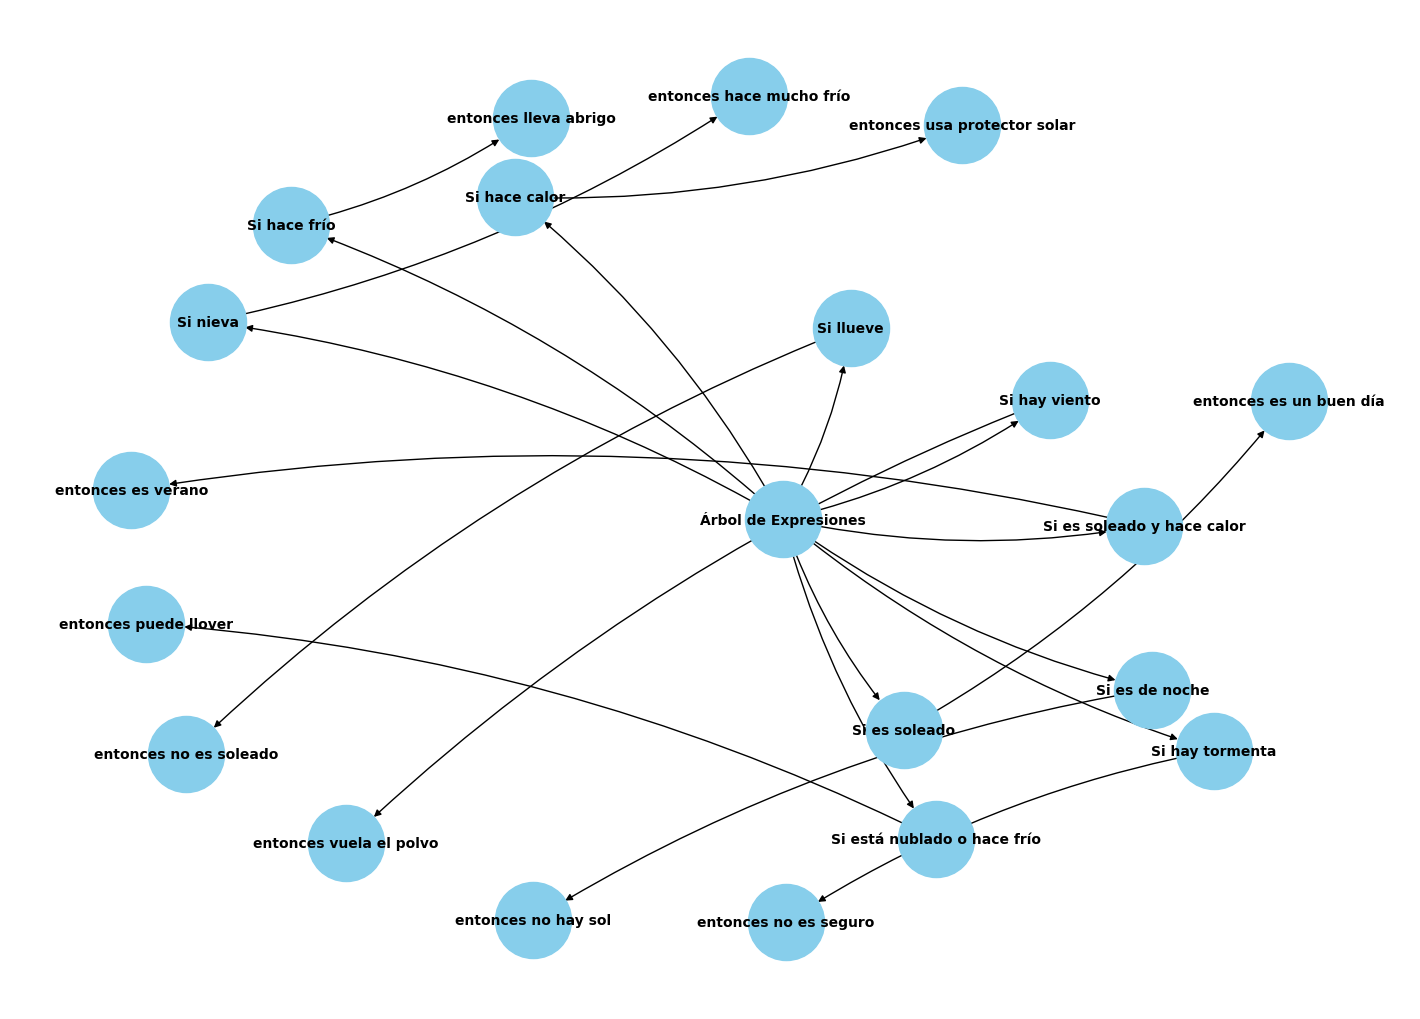

In [148]:
def generate_tree():
    # Crear el árbol de expresiones
    root = Node('Árbol de Expresiones')

    # Crear nodos para cada expresión
    expr1 = Node('Si es soleado')
    expr1_then = Node('entonces es un buen día')
    expr1.add_child(expr1_then)

    expr2 = Node('Si está nublado o hace frío')
    expr2_then = Node('entonces puede llover')
    expr2.add_child(expr2_then)

    expr3 = Node('Si llueve')
    expr3_then = Node('entonces no es soleado')
    expr3.add_child(expr3_then)

    expr4 = Node('Si hay tormenta')
    expr4_then = Node('entonces no es seguro')
    expr4.add_child(expr4_then)

    expr5 = Node('Si es de noche')
    expr5_then = Node('entonces no hay sol')
    expr5.add_child(expr5_then)

    expr6 = Node('Si hace frío')
    expr6_then = Node('entonces lleva abrigo')
    expr6.add_child(expr6_then)

    expr7 = Node('Si hace calor')
    expr7_then = Node('entonces usa protector solar')
    expr7.add_child(expr7_then)

    expr8 = Node('Si nieva')
    expr8_then = Node('entonces hace mucho frío')
    expr8.add_child(expr8_then)

    expr9 = Node('Si hay viento')
    expr9_then = Node('entonces vuela el polvo')
    expr9.add_child(expr9_then)

    expr10 = Node('Si es soleado y hace calor')
    expr10_then = Node('entonces es verano')
    expr10.add_child(expr10_then)

    # Agregar expresiones al nodo raíz
    root.add_child(expr1)
    root.add_child(expr2)
    root.add_child(expr3)
    root.add_child(expr4)
    root.add_child(expr5)
    root.add_child(expr6)
    root.add_child(expr7)
    root.add_child(expr8)
    root.add_child(expr9)
    root.add_child(expr10)

    return root

def add_edges(G, node, parent=None):
    if parent:
        G.add_edge(parent.value, node.value)
    for child in node.children:
        add_edges(G, child, node)

def visualize_tree(root):
    G = nx.DiGraph()
    add_edges(G, root)
    
    pos = nx.spring_layout(G, k=1.5, iterations=50)  # Ajustar el parámetro `k` para espaciar los nodos
    plt.figure(figsize=(14, 10))  # Ajustar el tamaño de la figura
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True, connectionstyle='arc3,rad=0.1')
    plt.show()

root = generate_tree()
visualize_tree(root)

In [149]:
## Motor de inferencia

In [150]:
pip install rich


Note: you may need to restart the kernel to use updated packages.


In [151]:
from rich.console import Console
from rich.panel import Panel
from rich.table import Table

class Node:
    def __init__(self, value, question=None):
        self.value = value
        self.question = question
        self.children = []

    def add_child(self, child):
        self.children.append(child)

def generate_tree():
    root = Node('¿Es soleado?', '¿Es soleado?')
    node1 = Node('Es un buen día')
    node2 = Node('¿Está nublado o hace frío?', '¿Está nublado o hace frío?')
    node3 = Node('Puede llover')
    node4 = Node('¿Hace frío?', '¿Hace frío?')
    node5 = Node('Lleva abrigo')
    node6 = Node('Usa protector solar')
    node7 = Node('No es soleado')
    node8 = Node('No es seguro')
    node9 = Node('No hay sol')
    node10 = Node('Hace mucho frío')
    node11 = Node('Vuela el polvo')
    node12 = Node('Es verano')

    root.add_child(node1)
    root.add_child(node2)
    node2.add_child(node3)
    node2.add_child(node4)
    node4.add_child(node5)
    node4.add_child(node6)
    root.add_child(node7)
    root.add_child(node8)
    root.add_child(node9)
    root.add_child(node10)
    root.add_child(node11)
    root.add_child(node12)

    return root

def infer(node):
    if not node.children:
        return node.value

    console = Console()
    console.print(Panel.fit(node.question, title="Pregunta"))

    table = Table(title="Opciones")
    table.add_column("Respuesta", justify="center", style="cyan")
    table.add_row("si")
    table.add_row("no")
    console.print(table)

    while True:
        answer = console.input("(si/no): ").strip().lower()
        if answer == 'si':
            return infer(node.children[0])
        elif answer == 'no':
            return infer(node.children[1])
        else:
            console.print("[bold red]Respuesta inválida. Por favor ingresa 'si' o 'no'.[/bold red]")

def display_result(result):
    console = Console()
    console.print(f'Resultado: {result}', style="green bold")

root = generate_tree()
result = infer(root)
display_result(result)


╭── Pregunta ──╮
│ ¿Es soleado? │
╰──────────────╯

  Opciones   
┏━━━━━━━━━━━┓
┃ Respuesta ┃
┡━━━━━━━━━━━┩
│    si     │
│    no     │
└───────────┘

(si/no):

Resultado: Es un buen día